In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import column2array

df_results = pd.read_csv("results_all.csv", index_col=0)
df_results.head(15)

/home/abazouzi/Documents/Code/DropHyper/drophyper/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


model            data  depth  epochs  best_val_accuracy  test_accuracy  \
0   HGNNP  CocitationCora      1       0           0.168614       0.168614   
1   HGNNP  CocitationCora      1      20           0.223131       0.196262   
2   HGNNP  CocitationCora      1      40           0.304517       0.304517   
3   HGNNP  CocitationCora      1      60           0.405763       0.405763   
4   HGNNP  CocitationCora      1      80           0.438863       0.438863   
5   HGNNP  CocitationCora      1     100           0.445093       0.445093   
6   HGNNP  CocitationCora      1     120           0.446262       0.446262   
7   HGNNP  CocitationCora      1     140           0.446262       0.440421   
8   HGNNP  CocitationCora      1     160           0.446262       0.440810   
9   HGNNP  CocitationCora      1     180           0.446262       0.429517   
10  HGNNP  CocitationCora      1     199           0.446262       0.446262   
11  HGNNP  CocitationCora      1       0           0.137072       0.137072   
12  HGNNP  CocitationCora      1      20           0.197430       0.176012   
13  HGNNP  CocitationCora      1      40           0.201713       0.201713   
14  HGNNP  CocitationCora      1      60           0.201713       0.156542   

   drop_method  drop_rate                                      oversmoothing  \
0   no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
1   no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
2   no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
3   no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
4   no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
5   no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
6   no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
7   no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
8   no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
9   no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
10  no dropout        0.5  [60.41443634033203, 23516.1875, 28027.46679687...   
11    dropnode        0.5  [273.83380126953125, 17740.08203125, 23459.392...   
12    dropnode        0.5  [273.83380126953125, 17740.08203125, 23459.392...   
13    dropnode        0.5  [273.83380126953125, 17740.08203125, 23459.392...   
14    dropnode        0.5  [273.83380126953125, 17740.08203125, 23459.392...   

                                         val_accuracy  
0   [0.16861370205879211, 0.22313083708286285, 0.1...  
1   [0.16861370205879211, 0.22313083708286285, 0.1...  
2   [0.16861370205879211, 0.22313083708286285, 0.1...  
3   [0.16861370205879211, 0.22313083708286285, 0.1...  
4   [0.16861370205879211, 0.22313083708286285, 0.1...  
5   [0.16861370205879211, 0.22313083708286285, 0.1...  
6   [0.16861370205879211, 0.22313083708286285, 0.1...  
7   [0.16861370205879211, 0.22313083708286285, 0.1...  
8   [0.16861370205879211, 0.22313083708286285, 0.1...  
9   [0.16861370205879211, 0.22313083708286285, 0.1...  
10  [0.16861370205879211, 0.22313083708286285, 0.1...  
11  [0.1370716542005539, 0.19742991030216217, 0.17...  
12  [0.1370716542005539, 0.19742991030216217, 0.17...  
13  [0.1370716542005539, 0.19742991030216217, 0.17...  
14  [0.1370716542005539, 0.19742991030216217, 0.17...

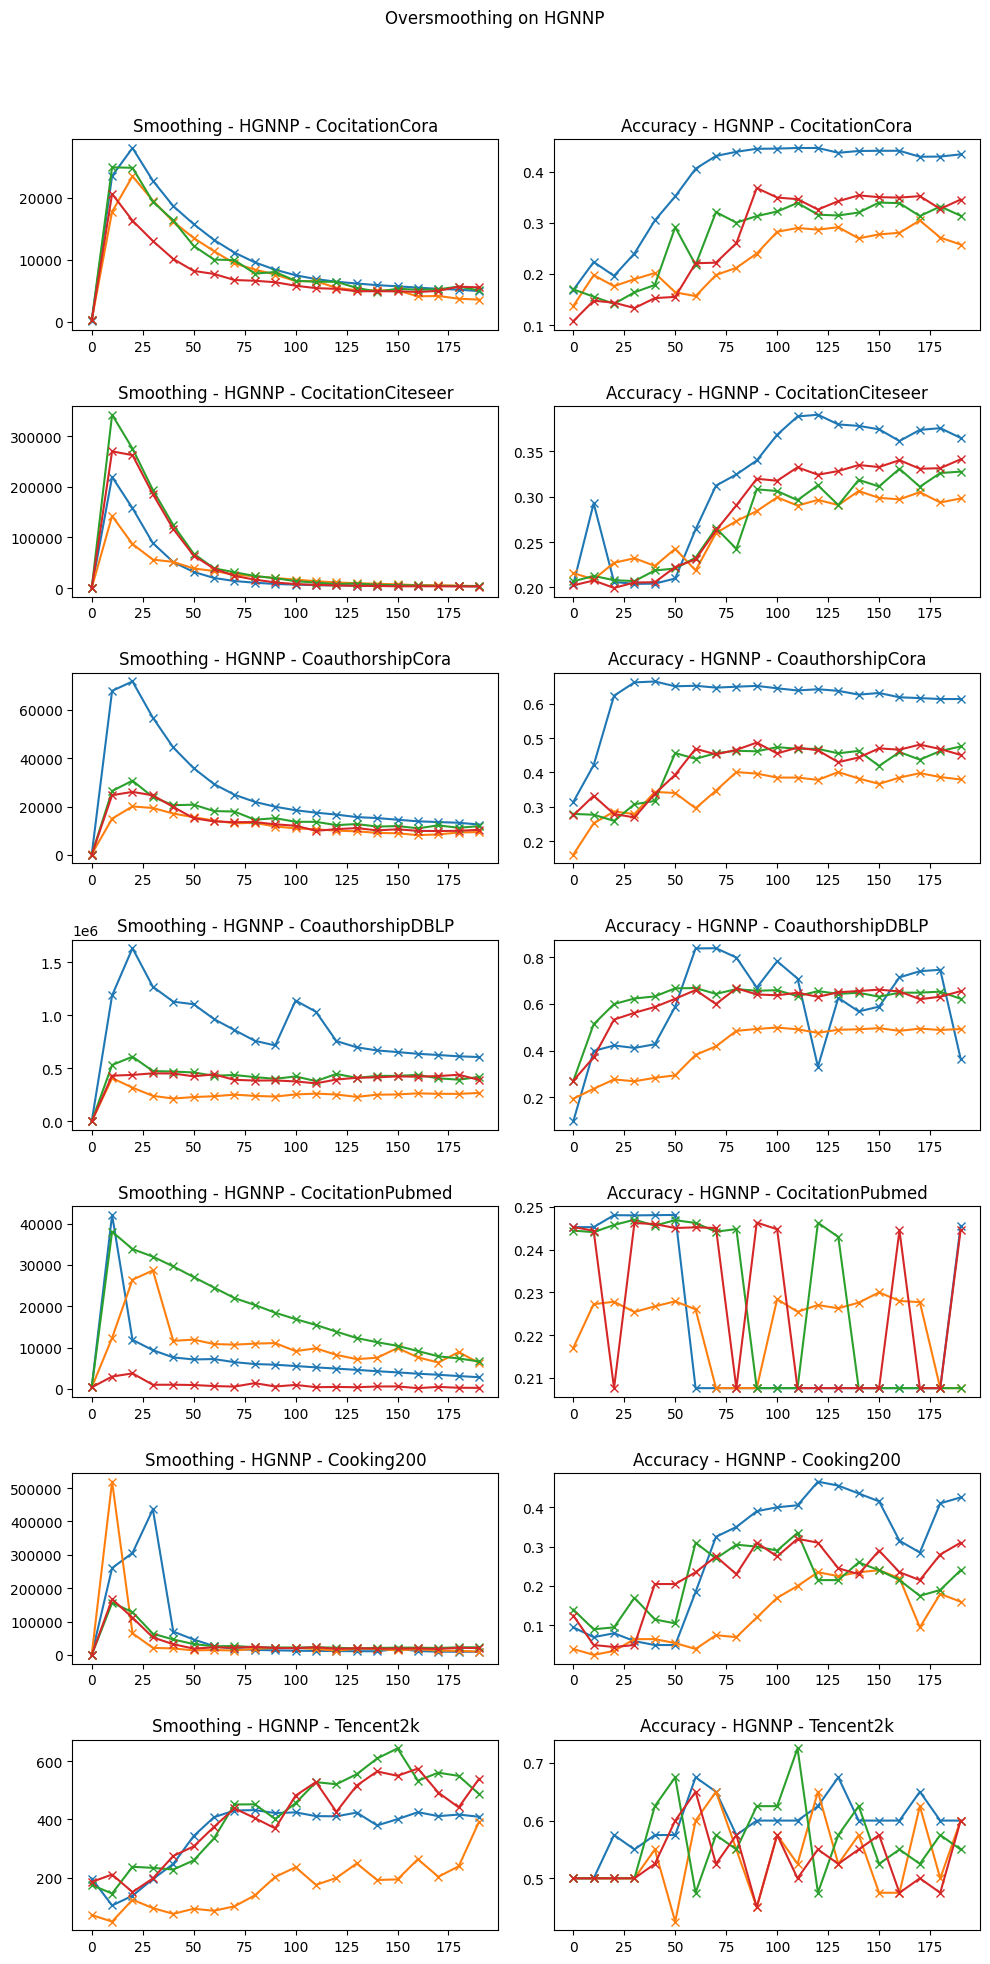

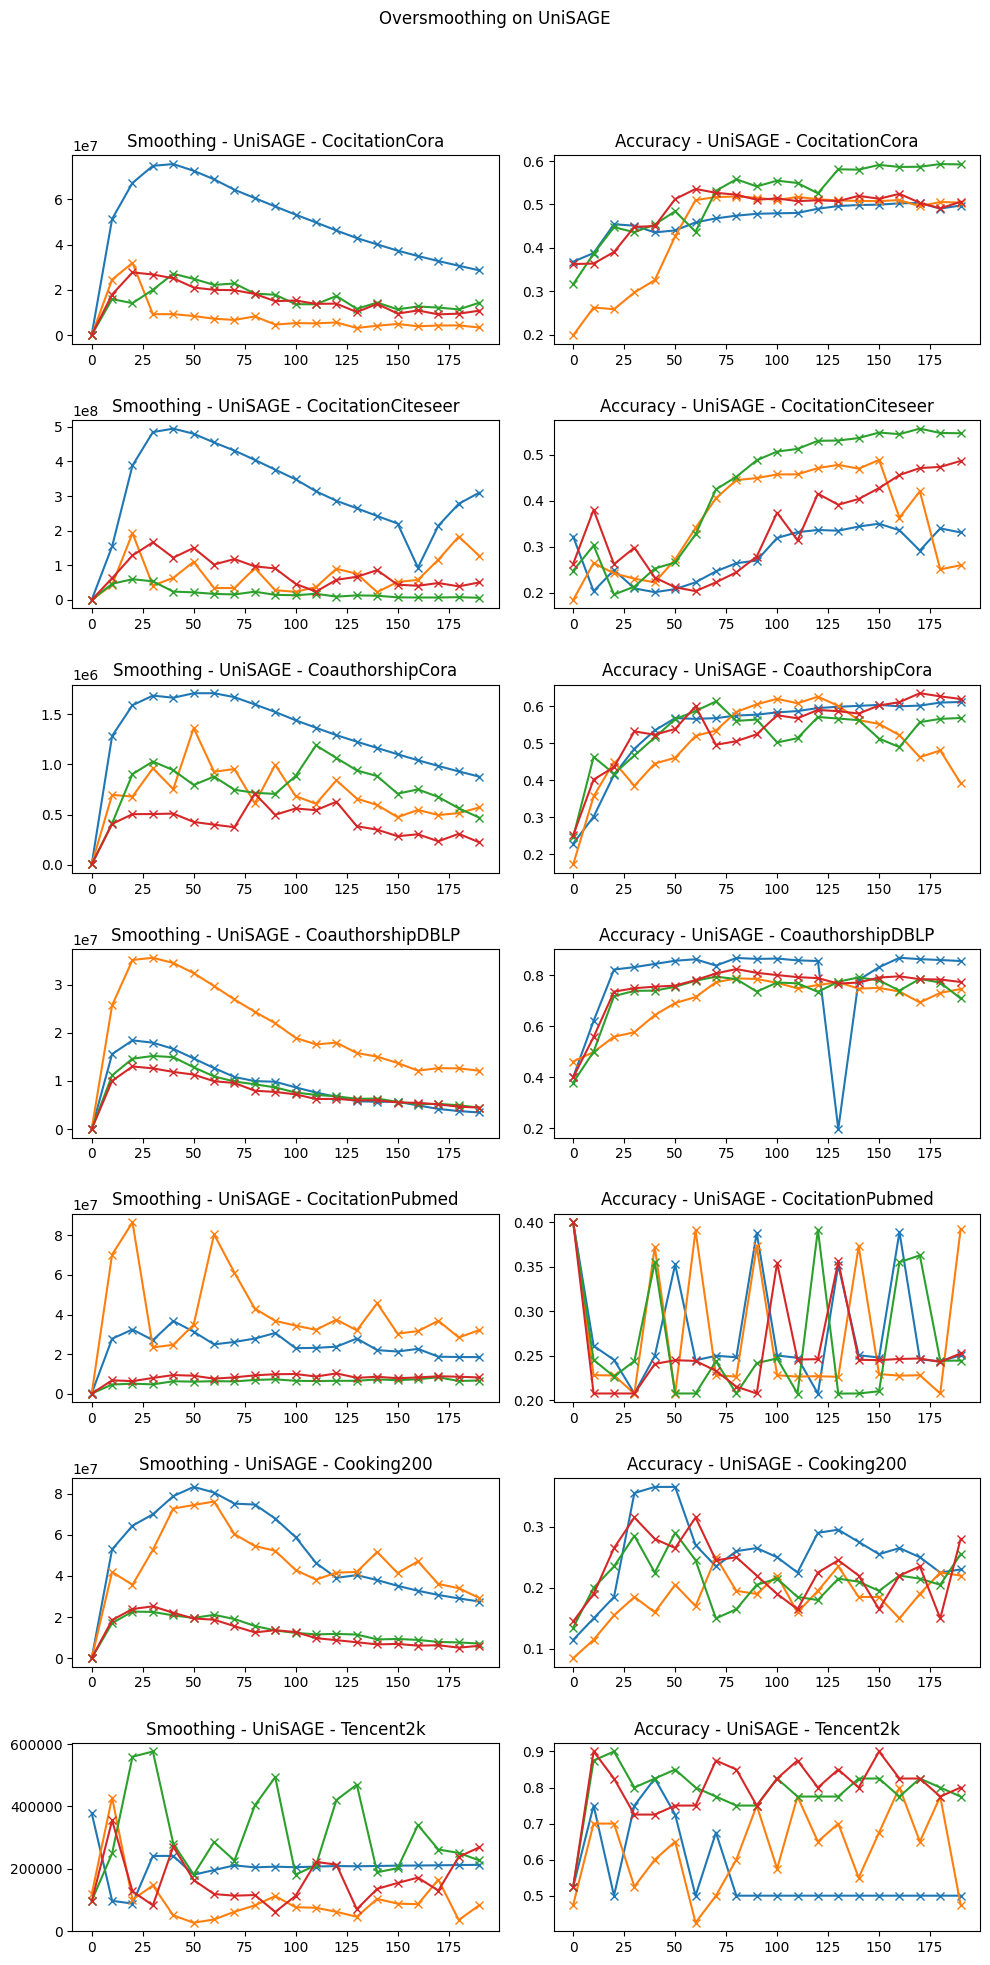

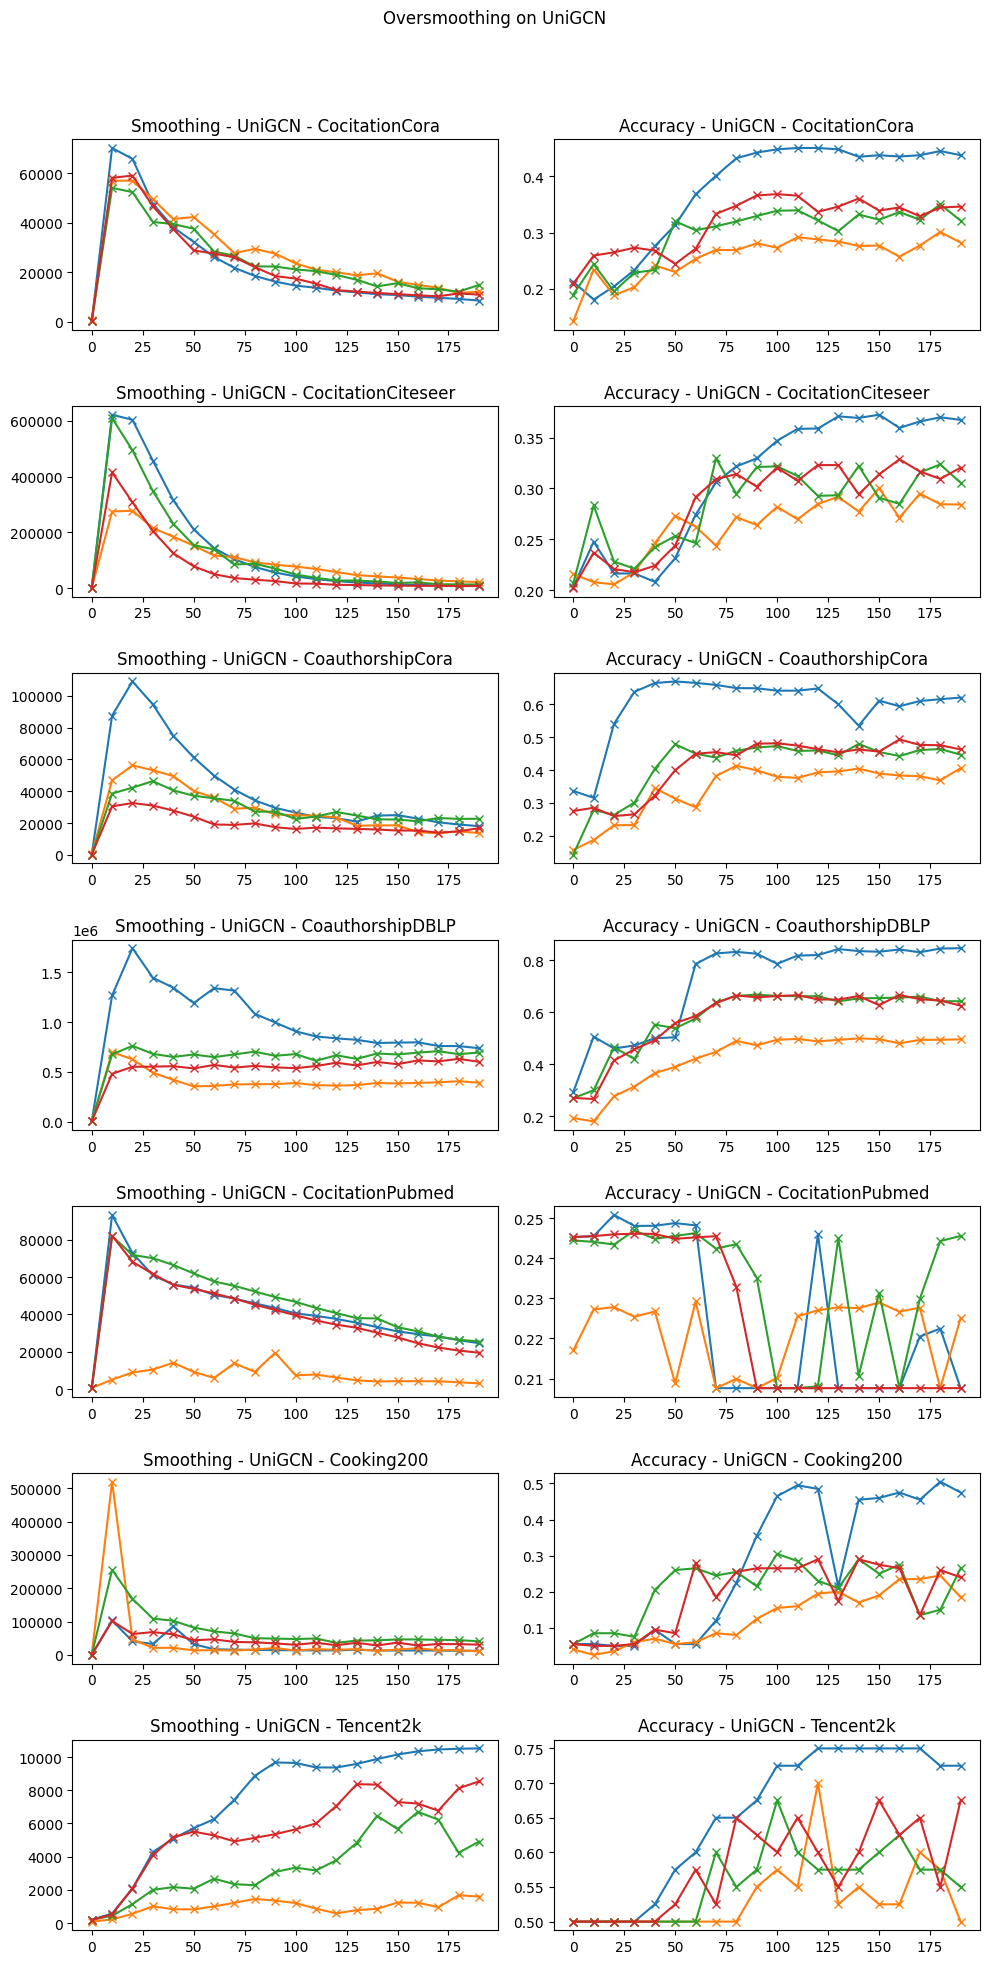

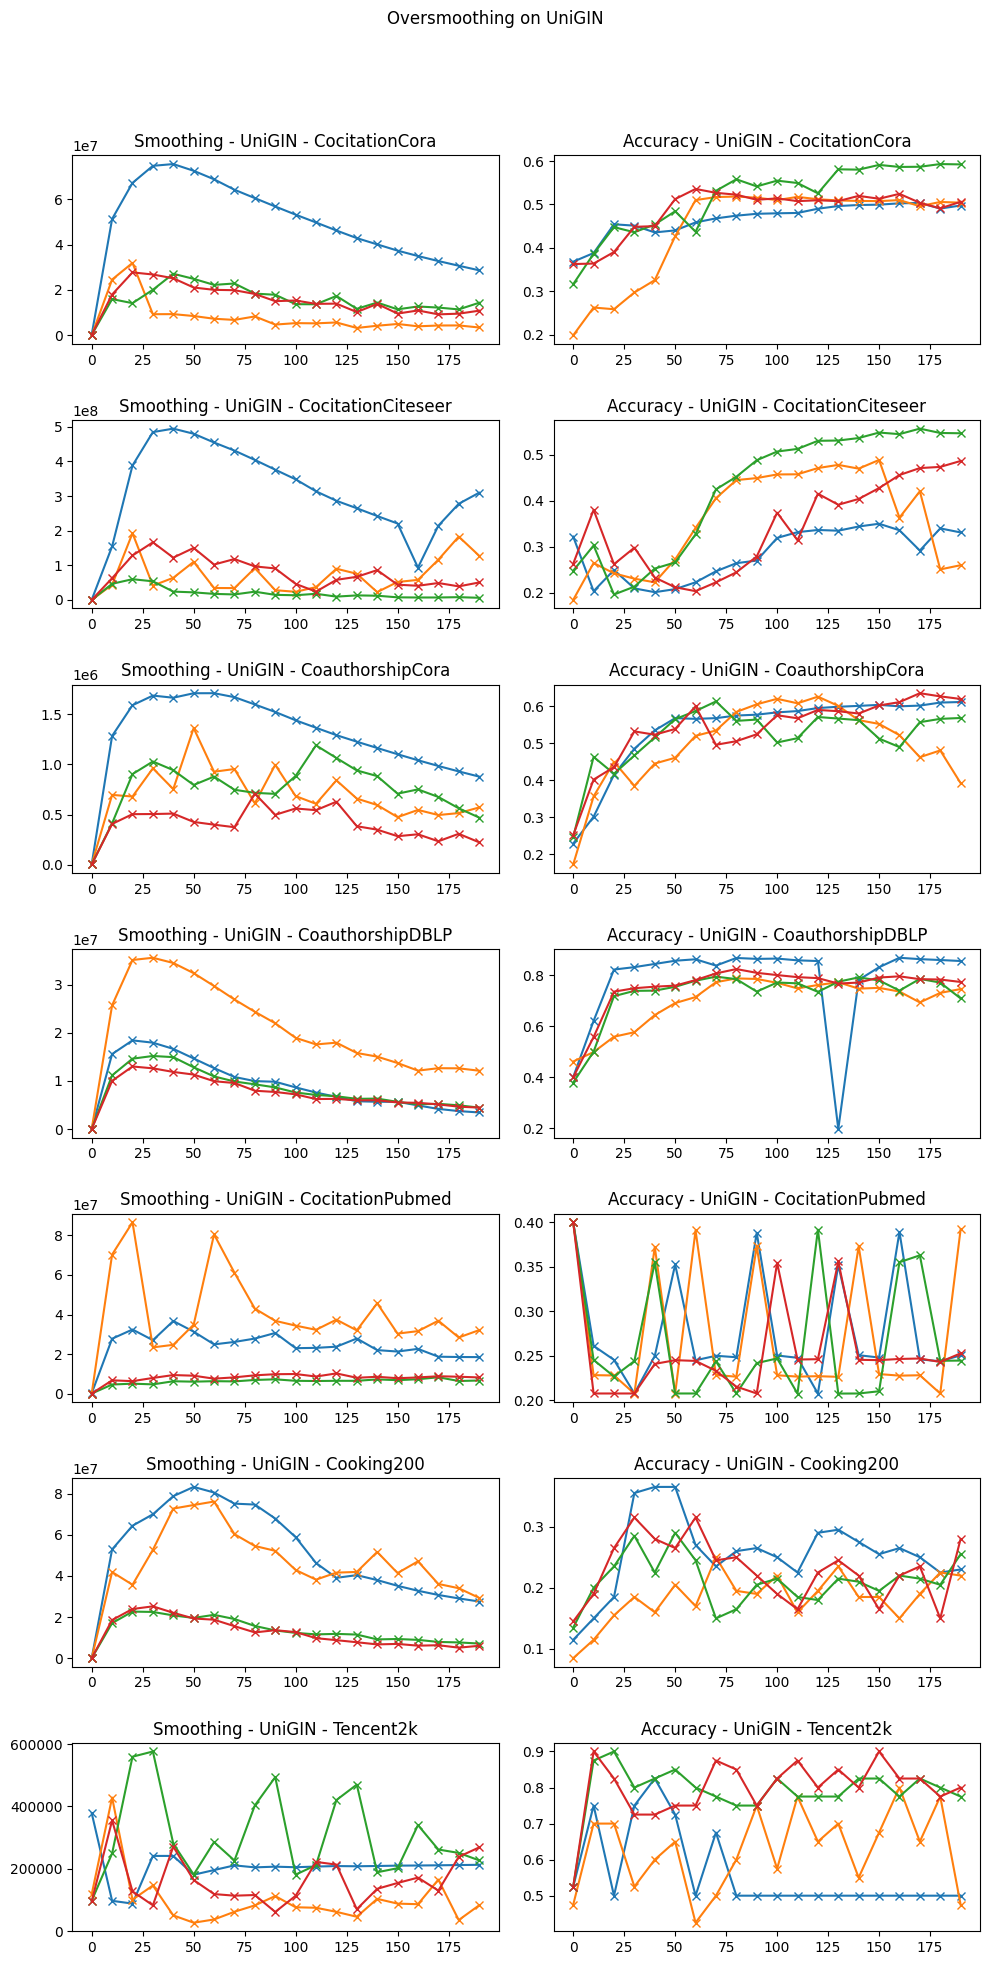

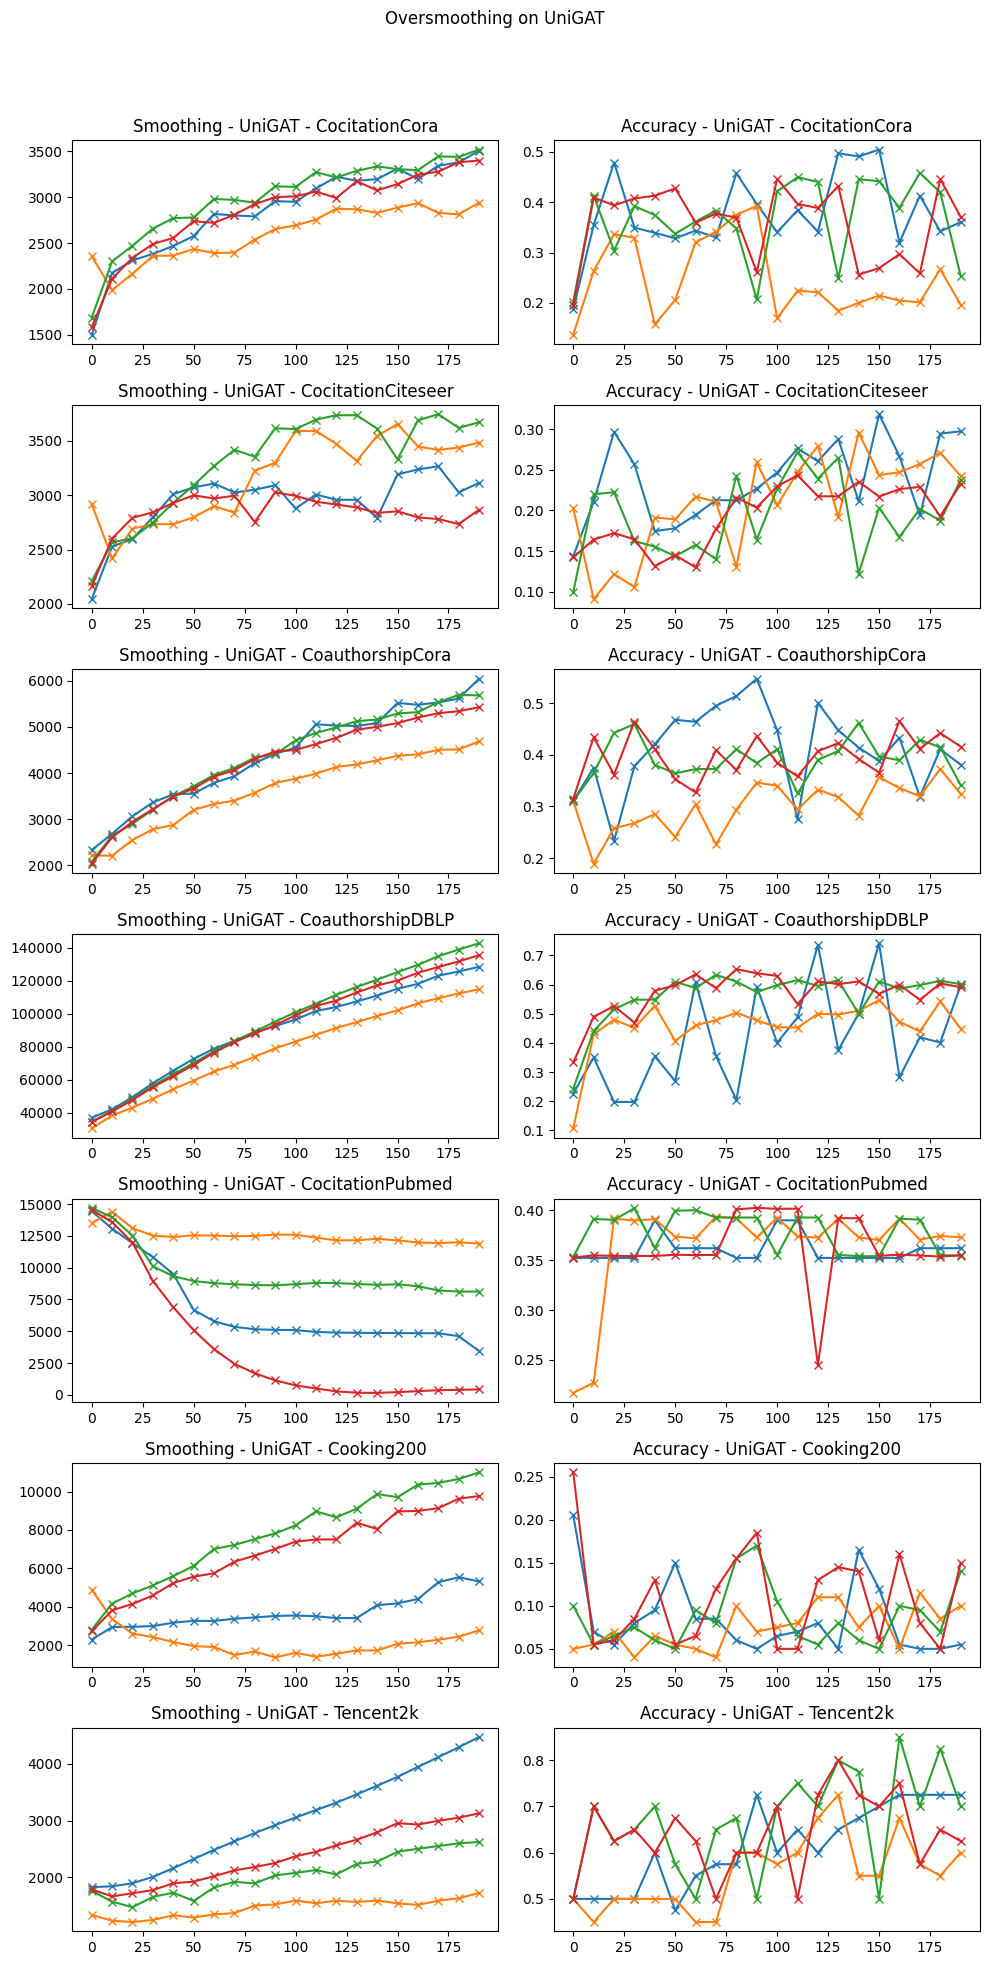

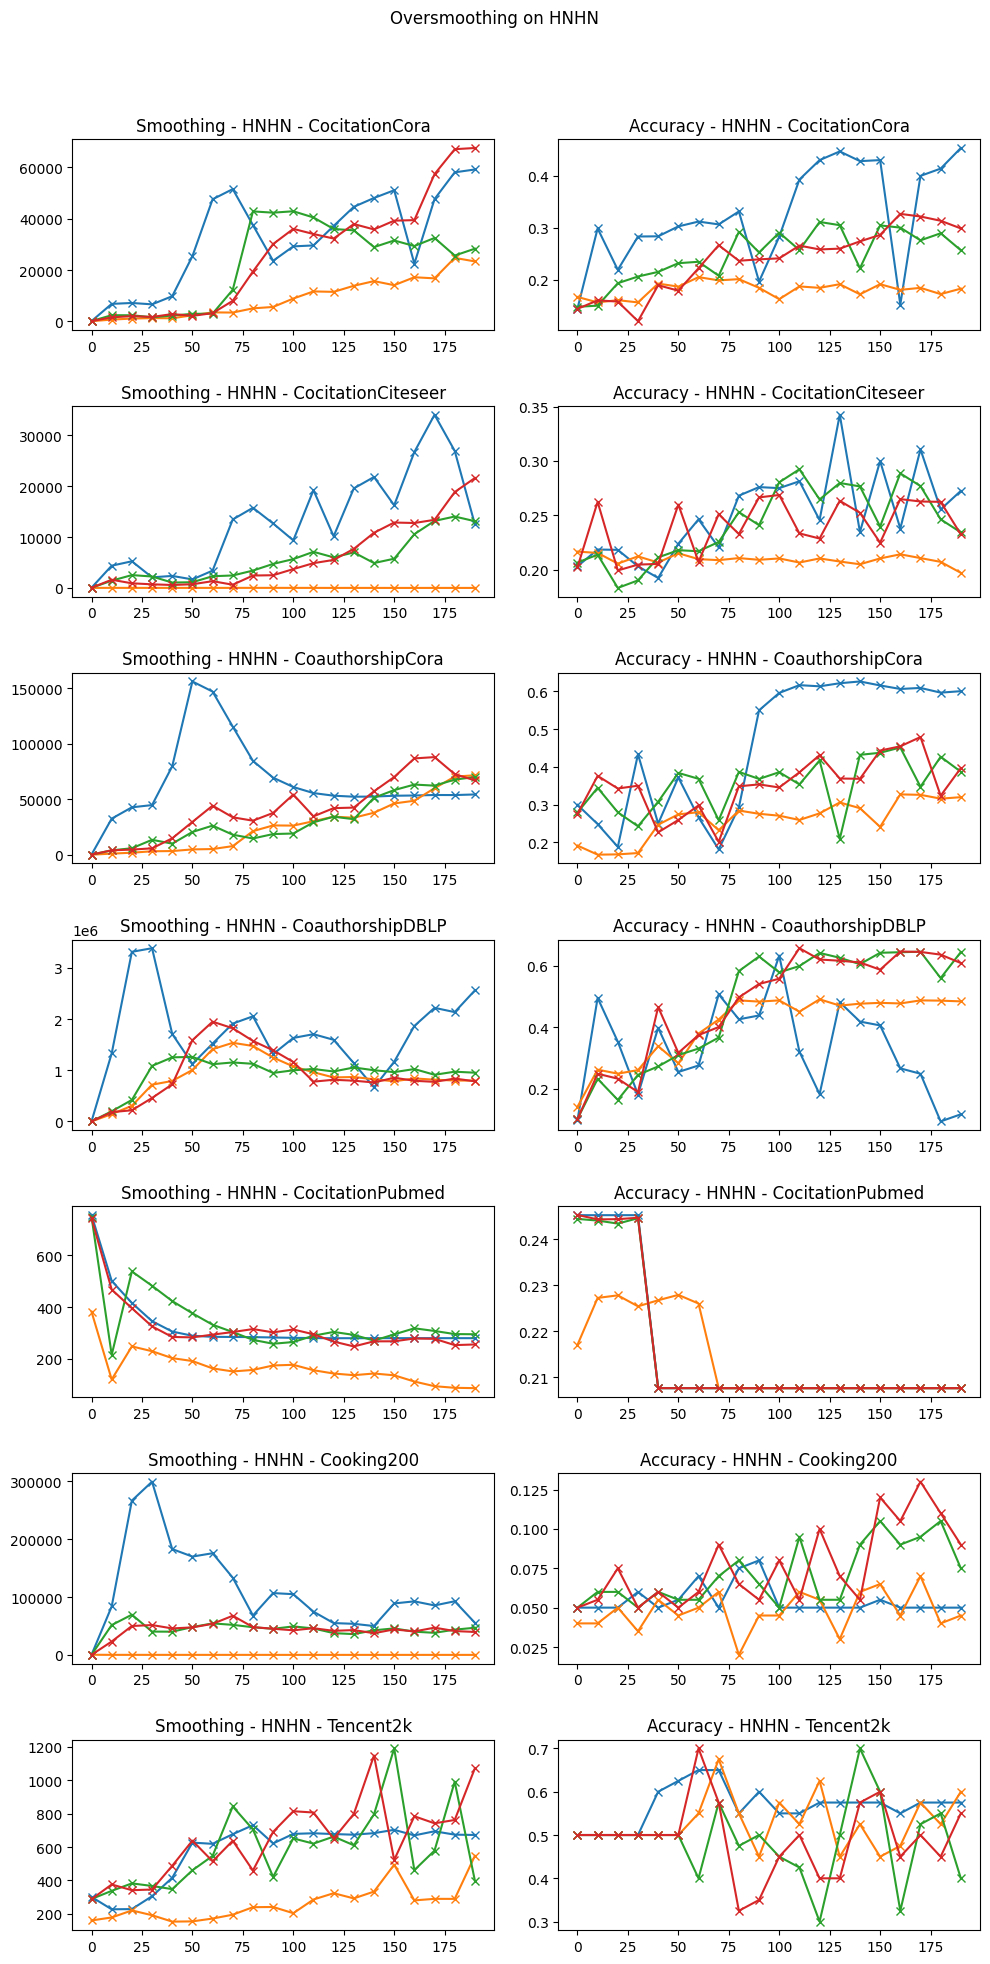

In [42]:
epochs = 200
drop_methods = ['no dropout', 'dropnode', 'dropedge', 'drophyperedge']
model_names = ['HGNNP', 'UniSAGE', 'UniGCN', 'UniGIN', 'UniGAT', 'HNHN']
#model_names = ['UniSAGE']
dataset_names = ['CocitationCora', 'CocitationCiteseer', 'CoauthorshipCora', 'CoauthorshipDBLP', 'CocitationPubmed', 'Cooking200', 'Tencent2k']
#dataset_names = ['CoauthorshipCora']
x_axis = [item * 10 for item in list(range(epochs//10))]
for model in model_names:

    i = 0
    j = 1
    fig, axes = plt.subplots(len(model_names), 2, figsize=(10, 20))

    axes = axes.flatten()

    
    for dataset in dataset_names: 
        values = df_results[(df_results['epochs']== epochs-1) & (df_results['data']== dataset) & (df_results['model']== model)]
        
        for method in drop_methods:
            values_smoothing = values[values['drop_method']== method]['oversmoothing'].values[0]
            values_smoothing = column2array(values_smoothing)
            axes[i].plot(x_axis, values_smoothing,'-x', label = method)  # Replace this with your specific plot logic
            axes[i].set_title(f"Smoothing - {model} - {dataset}")

            values_acc = values[values['drop_method']== method]['val_accuracy'].values[0]
            values_acc = column2array(values_acc)
            axes[j].plot(x_axis, values_acc,'-x', label = method)  # Replace this with your specific plot logic
            axes[j].set_title(f"Accuracy - {model} - {dataset}")        

        i += 2
        j += 2
    fig.suptitle(f"Oversmoothing on {model}")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

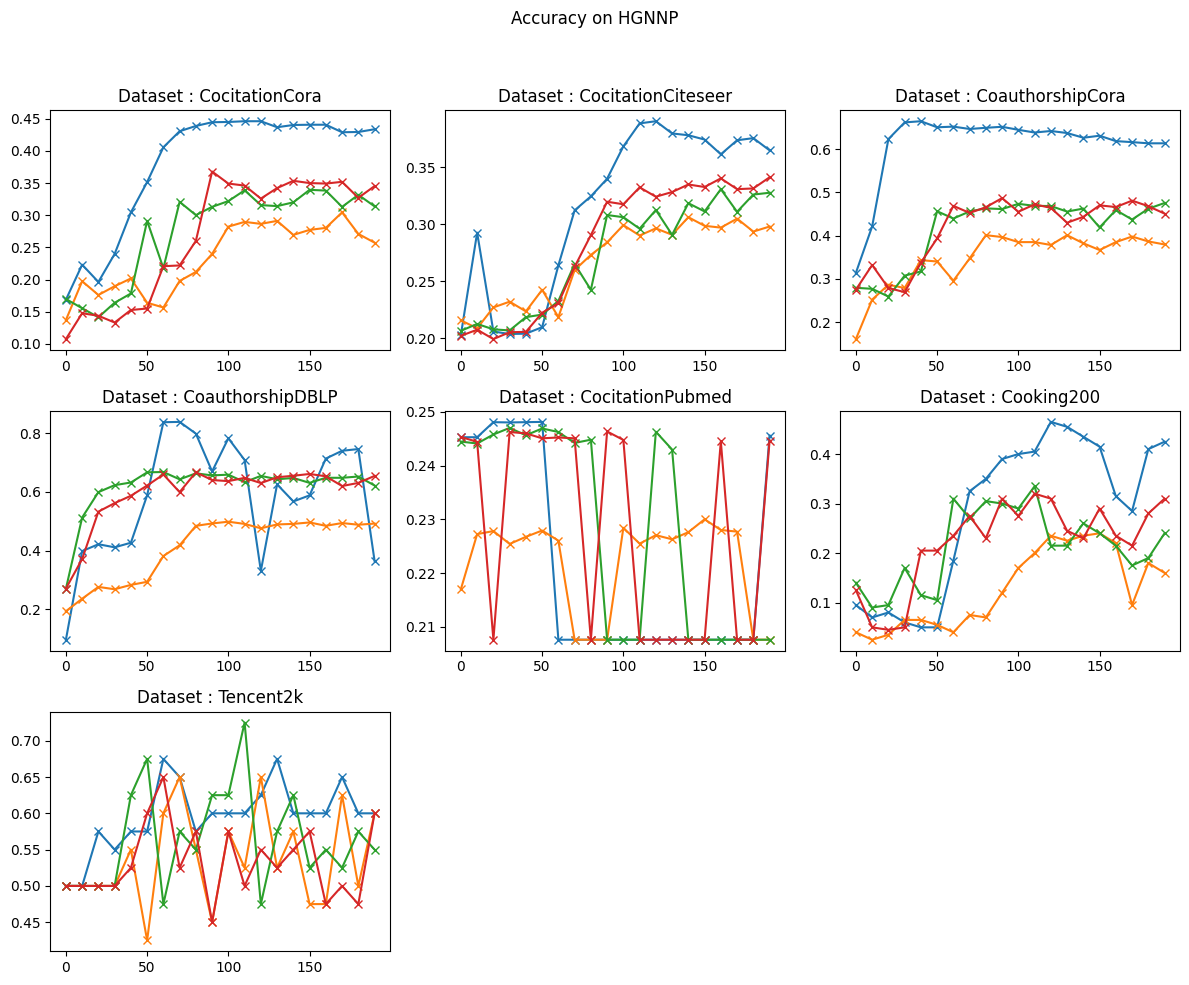

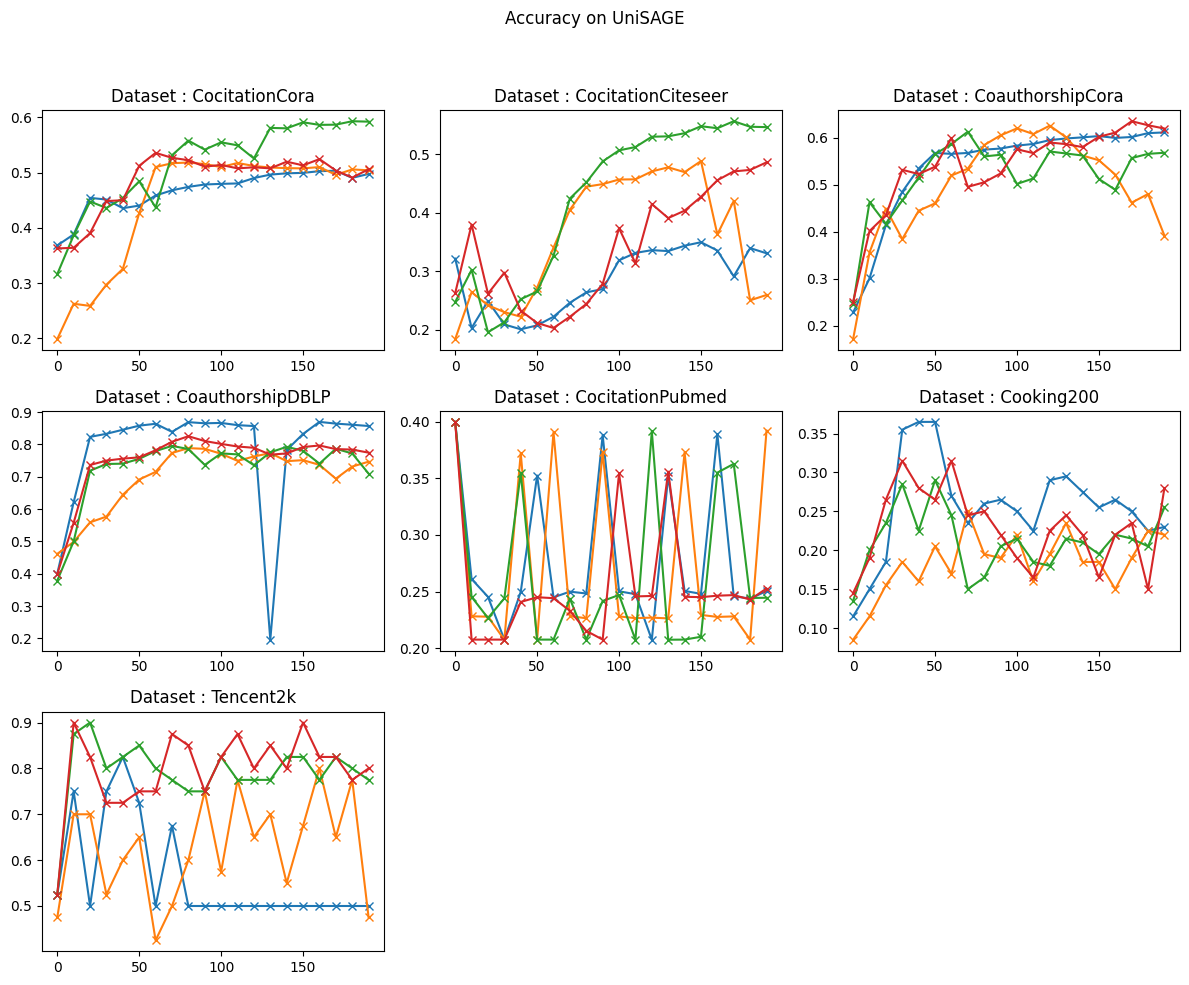

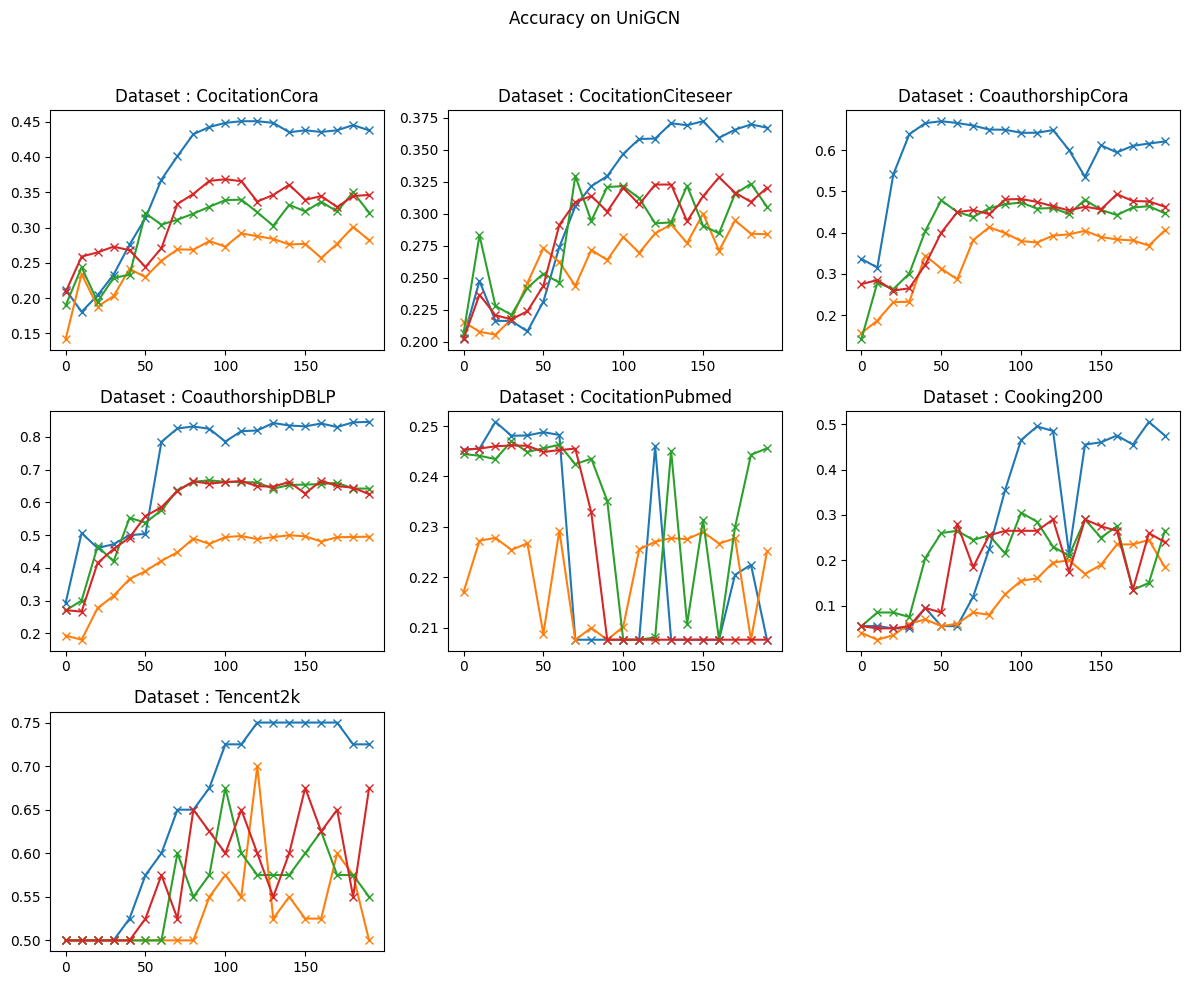

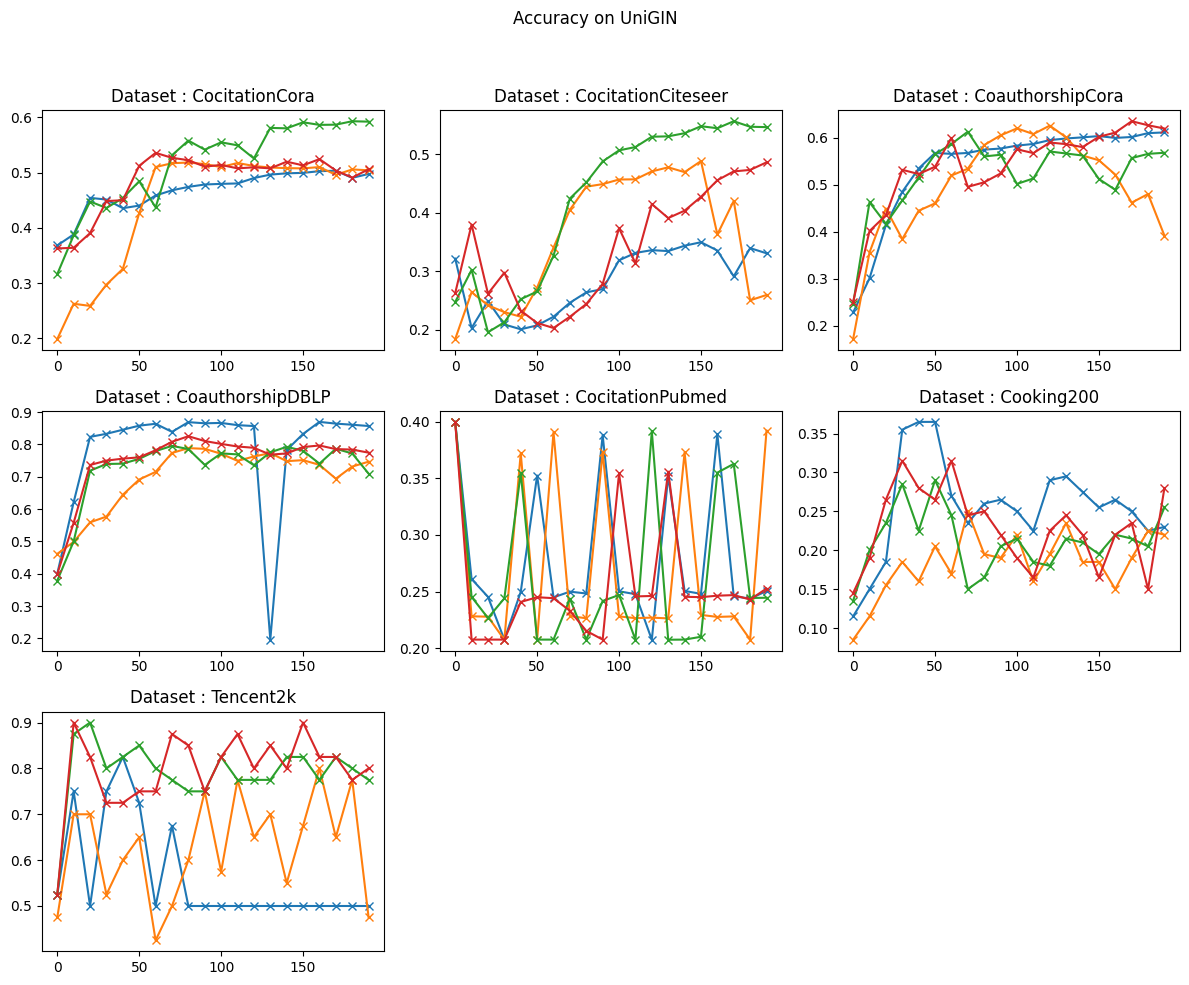

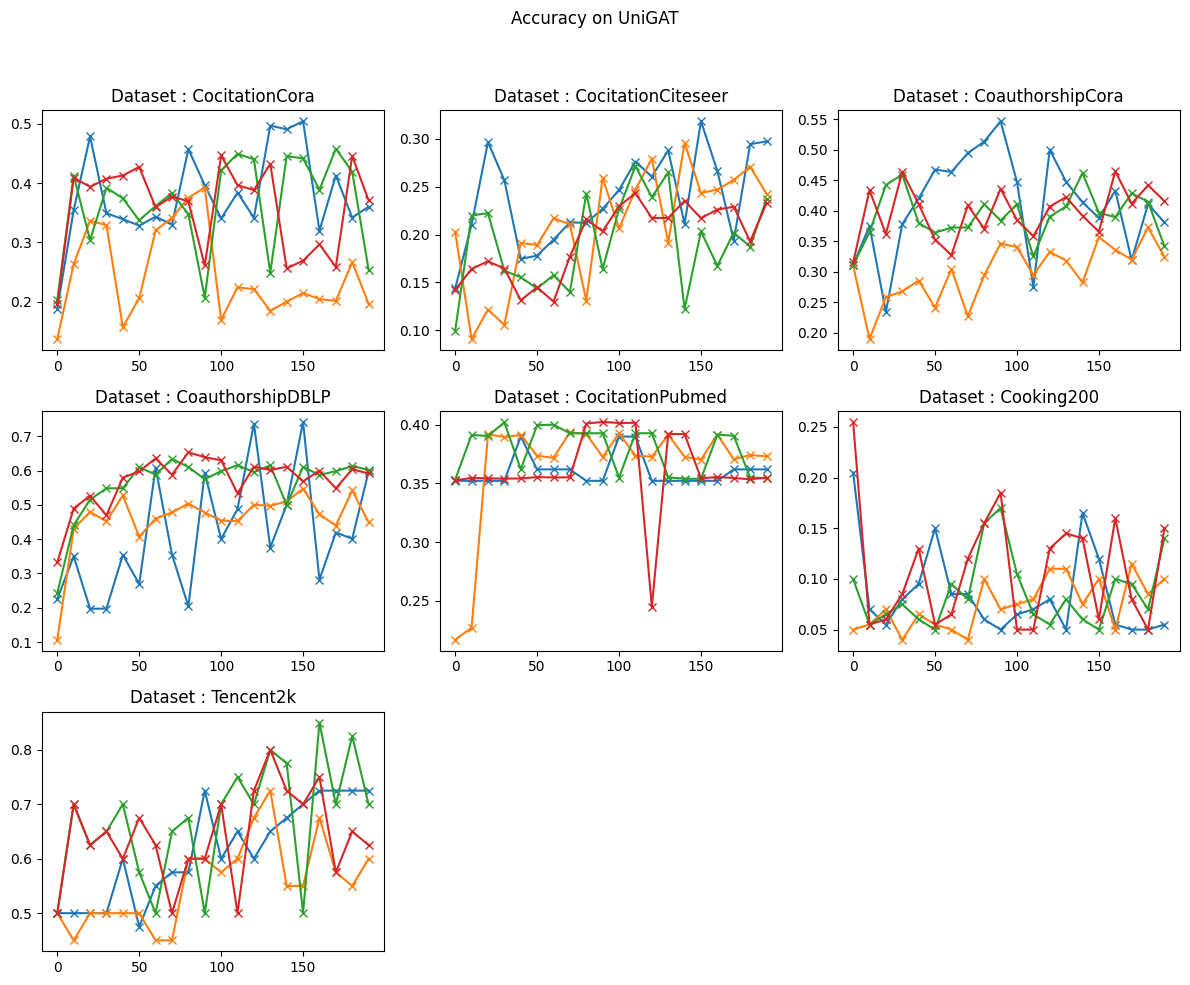

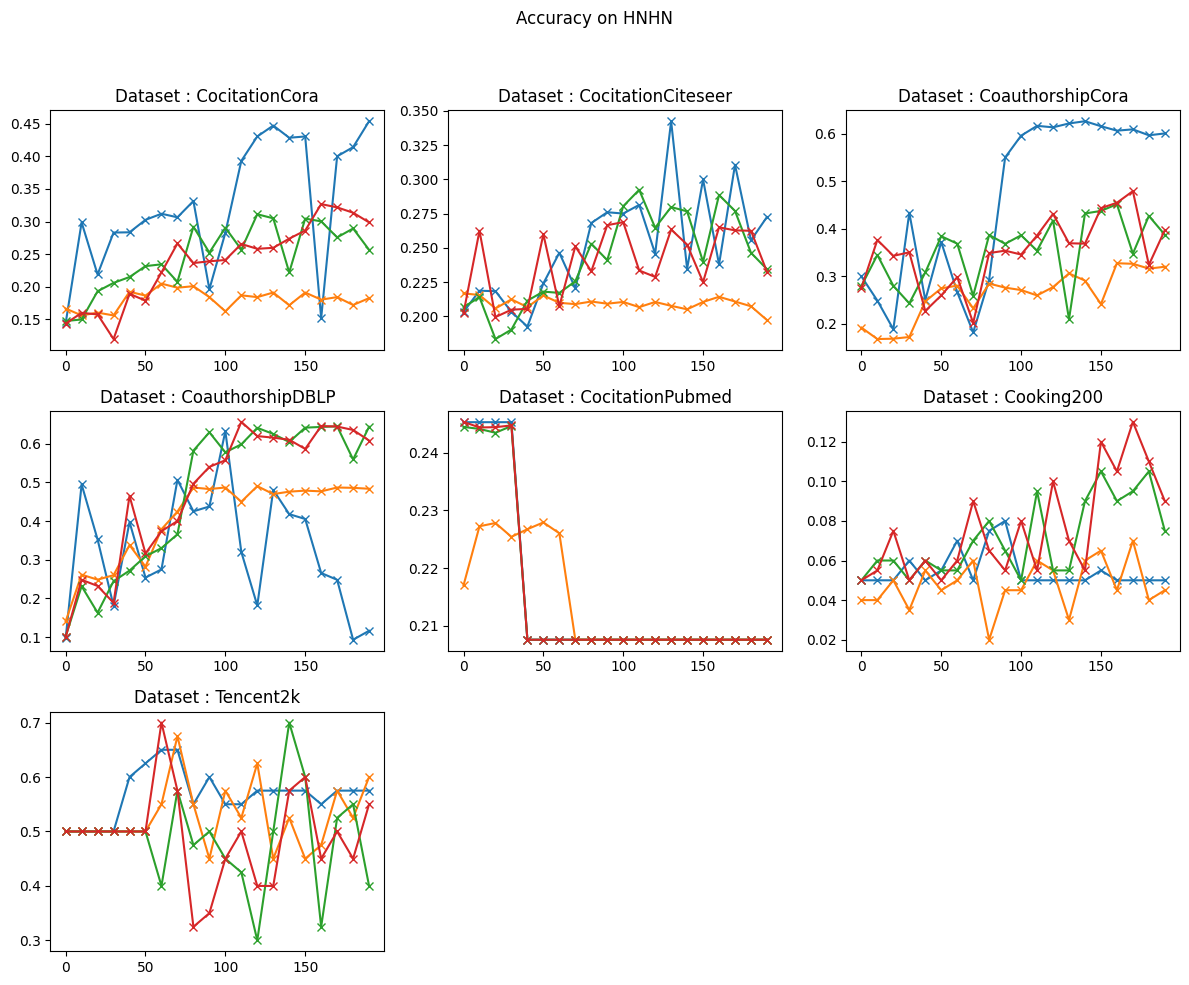

In [30]:
epochs = 200
drop_methods = ['no dropout', 'dropnode', 'dropedge', 'drophyperedge']
model_names = ['HGNNP', 'UniSAGE', 'UniGCN', 'UniGIN', 'UniGAT', 'HNHN']
#model_names = ['UniSAGE']
dataset_names = ['CocitationCora', 'CocitationCiteseer', 'CoauthorshipCora', 'CoauthorshipDBLP', 'CocitationPubmed', 'Cooking200', 'Tencent2k']
#dataset_names = ['CoauthorshipCora']
x_axis = [item * 10 for item in list(range(epochs//10))]
for model in model_names:

    i = 0
    fig, axes = plt.subplots(3, 3, figsize=(12, 10))

    axes = axes.flatten()

    
    for dataset in dataset_names: 
        oversmoothing_values = df_results[(df_results['epochs']== epochs-1) & (df_results['data']== dataset) & (df_results['model']== model)]
        
        
        for method in drop_methods:
            values = oversmoothing_values[oversmoothing_values['drop_method']== method]['val_accuracy'].values[0]
            values = column2array(values)

            axes[i].plot(x_axis, values,'-x', label = method)  # Replace this with your specific plot logic
            axes[i].set_title(f"Dataset : {dataset}")
            #plt.plot(x_axis, values,'-x', label = method)
        
        #plt.legend(prop={'size': 12}, title_fontsize=12)
        i += 1
    for j in range(len(dataset_names), len(axes)):
        fig.delaxes(axes[j])
    fig.suptitle(f"Accuracy on {model}")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()